<h2><img src="../day1/THE CODING HIVE.png" height="120" width ="120">  Coding A Neural Network: Image Classification</h2>

<h3>Step 1: Load the Libraries</h3>

In [1]:
import keras                               # deep learning package
from keras.datasets import mnist           # dataset we will use to train our model
from keras.layers import Dense             # Dense describes how the layers are connected
from keras.models import Sequential        # Sequential means we are creating a sequence of connectec layers
from keras.optimizers import SGD           # Sochastic gradient descent is the method used to find local minimum
import matplotlib.pyplot as plt            # visualize images
from keras.preprocessing import image      # preprocess images
#import tensorflowjs as tfjs

Using TensorFlow backend.


<h3>Step 2: Obtain Data</h3>

In [2]:
(train_x, train_y) , (test_x, test_y) = mnist.load_data()  #load images into training and test datasets
train_x = train_x.astype('float32') / 255                 #optional (you can rescale the RBG for each pixel)
test_x = test_x.astype('float32') / 255                   #optional (you can rescale the RBG for each pixel)
print(train_x.shape)                                       #let us view the dimensions of the train set
print(train_y.shape)                                       #let us view the dimentions of the train label
print(test_x.shape)                                        #view the dimensions of the test set
print(test_y.shape)                                        #view the dimensions of the test label

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
#look at the type of data stored in one image (there is 6000 of them!)
train_x[2]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

<h3>Step 3: Reshape Data</h3>

In [3]:
train_x = train_x.reshape(60000,784)                #reduce dimensions from 28x28 to 1x784
test_x = test_x.reshape(10000,784)                  #reduce dimensions from 28x28 to 1x784
train_y = keras.utils.to_categorical(train_y,10)    #convert y label to categorical with 10 possible outputs
test_y = keras.utils.to_categorical(test_y,10)      #convert y label to categorical with 10 possible outputs
print(train_x.shape)                                #view the new shape of training set
print(train_y.shape)                                #view the new shape of training label
print(test_x.shape)                                 #view the new shape of the test set
print(test_y.shape)                                 #view the new shape of the test label

(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)


In [6]:
train_x[10] #view the content of one reshaped image. How is it different from before?


array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

<h3>Step 4: Define Your Model</h3>

In [4]:
model = Sequential()                                               #explain sequential 
model.add(Dense(units=128,activation="relu",input_shape=(784,)))   #first layer
model.add(Dense(units=128,activation="relu"))                      #second layer
model.add(Dense(units=128,activation="relu"))                      #third layer
model.add(Dense(units=10,activation="softmax"))                    #output layer
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
_________________________________________________________________


<h3>Step 5: Compile Your Model</h3>

In [5]:
model.compile(optimizer=SGD(0.001),loss="categorical_crossentropy",metrics=["accuracy"])

#what is SGD?
#what is lr?
#what is loss?

<h3>Step 6: Fit Your Model</h3>

In [6]:
history=model.fit(train_x,train_y,batch_size=32,epochs=50,verbose=1)
#train_x: Your training dataset
#train_y: Your training label
#epochs:       one forward pass and one backward pass of all the training examples
#batch_size:   the number of training examples in one forward/backward pass
#verbose: display log on screen

Epoch 1/50
   32/60000 [..............................] - ETA: 3:32 - loss: 2.3123 - accuracy: 0.1562

  320/60000 [..............................] - ETA: 39s - loss: 2.3256 - accuracy: 0.1125 

  640/60000 [..............................] - ETA: 29s - loss: 2.3146 - accuracy: 0.1328

  992/60000 [..............................] - ETA: 24s - loss: 2.3125 - accuracy: 0.1310

 1312/60000 [..............................] - ETA: 22s - loss: 2.3118 - accuracy: 0.1280

 1664/60000 [..............................] - ETA: 21s - loss: 2.3128 - accuracy: 0.1262

 1824/60000 [..............................] - ETA: 21s - loss: 2.3116 - accuracy: 0.1277

 2048/60000 [>.............................] - ETA: 20s - loss: 2.3108 - accuracy: 0.1265

 2368/60000 [>.............................] - ETA: 19s - loss: 2.3074 - accuracy: 0.1322

 2752/60000 [>.............................] - ETA: 18s - loss: 2.3056 - accuracy: 0.1337

 3040/60000 [>.............................] - ETA: 18s - loss: 2.3028 - accuracy: 0.1375

 3392/60000 [>.............................] - ETA: 18s - loss: 2.3004 - accuracy: 0.1389



 3712/60000 [>.............................] - ETA: 18s - loss: 2.3000 - accuracy: 0.1404

 3872/60000 [>.............................] - ETA: 18s - loss: 2.2991 - accuracy: 0.1426

 3936/60000 [>.............................] - ETA: 18s - loss: 2.2984 - accuracy: 0.1441

 4160/60000 [=>............................] - ETA: 18s - loss: 2.2966 - accuracy: 0.1466

 4480/60000 [=>............................] - ETA: 18s - loss: 2.2958 - accuracy: 0.1482

 4864/60000 [=>............................] - ETA: 18s - loss: 2.2943 - accuracy: 0.1484

 5184/60000 [=>............................] - ETA: 18s - loss: 2.2928 - accuracy: 0.1493

 5504/60000 [=>............................] - ETA: 17s - loss: 2.2913 - accuracy: 0.1497

 5856/60000 [=>............................] - ETA: 17s - loss: 2.2895 - accuracy: 0.1535

 6176/60000 [==>...........................] - ETA: 17s - loss: 2.2873 - accuracy: 0.1561

 6400/60000 [==>...........................] - ETA: 17s - loss: 2.2867 - accuracy: 0.1566

 6784/60000 [==>...........................] - ETA: 17s - loss: 2.2860 - accuracy: 0.1565

 7136/60000 [==>...........................] - ETA: 17s - loss: 2.2846 - accuracy: 0.1565

 7424/60000 [==>...........................] - ETA: 17s - loss: 2.2831 - accuracy: 0.1580

 7744/60000 [==>...........................] - ETA: 16s - loss: 2.2808 - accuracy: 0.1619

 8096/60000 [===>..........................] - ETA: 16s - loss: 2.2800 - accuracy: 0.1614

 8384/60000 [===>..........................] - ETA: 16s - loss: 2.2785 - accuracy: 0.1622

 8704/60000 [===>..........................] - ETA: 16s - loss: 2.2766 - accuracy: 0.1651

 9056/60000 [===>..........................] - ETA: 16s - loss: 2.2754 - accuracy: 0.1661

 9376/60000 [===>..........................] - ETA: 16s - loss: 2.2741 - accuracy: 0.1679

 9760/60000 [===>..........................] - ETA: 16s - loss: 2.2723 - accuracy: 0.1704

10112/60000 [====>.........................] - ETA: 15s - loss: 2.2710 - accuracy: 0.1713

10464/60000 [====>.........................] - ETA: 15s - loss: 2.2692 - accuracy: 0.1742

10784/60000 [====>.........................] - ETA: 15s - loss: 2.2677 - accuracy: 0.1761

10848/60000 [====>.........................] - ETA: 15s - loss: 2.2675 - accuracy: 0.1767

11168/60000 [====>.........................] - ETA: 15s - loss: 2.2660 - accuracy: 0.1786

11552/60000 [====>.........................] - ETA: 14s - loss: 2.2644 - accuracy: 0.1806

11584/60000 [====>.........................] - ETA: 15s - loss: 2.2642 - accuracy: 0.1809

11904/60000 [====>.........................] - ETA: 15s - loss: 2.2628 - accuracy: 0.1828

12224/60000 [=====>........................] - ETA: 14s - loss: 2.2616 - accuracy: 0.1832

12544/60000 [=====>........................] - ETA: 14s - loss: 2.2603 - accuracy: 0.1845

12608/60000 [=====>........................] - ETA: 14s - loss: 2.2598 - accuracy: 0.1849

12864/60000 [=====>........................] - ETA: 14s - loss: 2.2589 - accuracy: 0.1852

13184/60000 [=====>........................] - ETA: 14s - loss: 2.2571 - accuracy: 0.1877

13536/60000 [=====>........................] - ETA: 14s - loss: 2.2554 - accuracy: 0.1905

13920/60000 [=====>........................] - ETA: 14s - loss: 2.2538 - accuracy: 0.1923

14304/60000 [======>.......................] - ETA: 14s - loss: 2.2521 - accuracy: 0.1949

14656/60000 [======>.......................] - ETA: 13s - loss: 2.2506 - accuracy: 0.1969

14976/60000 [======>.......................] - ETA: 13s - loss: 2.2493 - accuracy: 0.1983

15360/60000 [======>.......................] - ETA: 13s - loss: 2.2478 - accuracy: 0.2008

15744/60000 [======>.......................] - ETA: 13s - loss: 2.2462 - accuracy: 0.2034

16032/60000 [=======>......................] - ETA: 13s - loss: 2.2448 - accuracy: 0.2053

16096/60000 [=======>......................] - ETA: 13s - loss: 2.2446 - accuracy: 0.2057

16352/60000 [=======>......................] - ETA: 13s - loss: 2.2434 - accuracy: 0.2076

16704/60000 [=======>......................] - ETA: 13s - loss: 2.2418 - accuracy: 0.2103

17088/60000 [=======>......................] - ETA: 13s - loss: 2.2399 - accuracy: 0.2123

17440/60000 [=======>......................] - ETA: 12s - loss: 2.2384 - accuracy: 0.2135

17792/60000 [=======>......................] - ETA: 12s - loss: 2.2368 - accuracy: 0.2158

18176/60000 [========>.....................] - ETA: 12s - loss: 2.2351 - accuracy: 0.2185

18496/60000 [========>.....................] - ETA: 12s - loss: 2.2337 - accuracy: 0.2210

18848/60000 [========>.....................] - ETA: 12s - loss: 2.2322 - accuracy: 0.2229

19104/60000 [========>.....................] - ETA: 12s - loss: 2.2311 - accuracy: 0.2250

19136/60000 [========>.....................] - ETA: 12s - loss: 2.2309 - accuracy: 0.2254

19456/60000 [========>.....................] - ETA: 12s - loss: 2.2292 - accuracy: 0.2278

19776/60000 [========>.....................] - ETA: 12s - loss: 2.2276 - accuracy: 0.2298

…

43744/60000 [====================>.........] - ETA: 4s - loss: 0.1421 - accuracy: 0.9597

44096/60000 [=====================>........] - ETA: 4s - loss: 0.1416 - accuracy: 0.9597

44192/60000 [=====================>........] - ETA: 4s - loss: 0.1416 - accuracy: 0.9598

44544/60000 [=====================>........] - ETA: 3s - loss: 0.1417 - accuracy: 0.9597

44960/60000 [=====================>........] - ETA: 3s - loss: 0.1420 - accuracy: 0.9597

45344/60000 [=====================>........] - ETA: 3s - loss: 0.1419 - accuracy: 0.9597

45760/60000 [=====================>........] - ETA: 3s - loss: 0.1421 - accuracy: 0.9596

46176/60000 [======================>.......] - ETA: 3s - loss: 0.1423 - accuracy: 0.9595

46624/60000 [======================>.......] - ETA: 3s - loss: 0.1424 - accuracy: 0.9595

47040/60000 [======================>.......] - ETA: 3s - loss: 0.1418 - accuracy: 0.9597

47456/60000 [======================>.......] - ETA: 3s - loss: 0.1423 - accuracy: 0.9597

47840/60000 [======================>.......] - ETA: 3s - loss: 0.1425 - accuracy: 0.9597

48224/60000 [=======================>......] - ETA: 2s - loss: 0.1425 - accuracy: 0.9598

48608/60000 [=======================>......] - ETA: 2s - loss: 0.1426 - accuracy: 0.9597

49024/60000 [=======================>......] - ETA: 2s - loss: 0.1426 - accuracy: 0.9597

49376/60000 [=======================>......] - ETA: 2s - loss: 0.1423 - accuracy: 0.9598

49792/60000 [=======================>......] - ETA: 2s - loss: 0.1425 - accuracy: 0.9598

50176/60000 [========================>.....] - ETA: 2s - loss: 0.1422 - accuracy: 0.9599

50592/60000 [========================>.....] - ETA: 2s - loss: 0.1424 - accuracy: 0.9599

50976/60000 [========================>.....] - ETA: 2s - loss: 0.1422 - accuracy: 0.9599

51392/60000 [========================>.....] - ETA: 2s - loss: 0.1425 - accuracy: 0.9597

51776/60000 [========================>.....] - ETA: 2s - loss: 0.1424 - accuracy: 0.9596

52128/60000 [=========================>....] - ETA: 2s - loss: 0.1423 - accuracy: 0.9597

52544/60000 [=========================>....] - ETA: 1s - loss: 0.1425 - accuracy: 0.9595

52896/60000 [=========================>....] - ETA: 1s - loss: 0.1424 - accuracy: 0.9595

53312/60000 [=========================>....] - ETA: 1s - loss: 0.1425 - accuracy: 0.9593

53728/60000 [=========================>....] - ETA: 1s - loss: 0.1423 - accuracy: 0.9593

54080/60000 [==========================>...] - ETA: 1s - loss: 0.1422 - accuracy: 0.9594

54464/60000 [==========================>...] - ETA: 1s - loss: 0.1421 - accuracy: 0.9595

54848/60000 [==========================>...] - ETA: 1s - loss: 0.1421 - accuracy: 0.9595

55264/60000 [==========================>...] - ETA: 1s - loss: 0.1420 - accuracy: 0.9595

55648/60000 [==========================>...] - ETA: 1s - loss: 0.1420 - accuracy: 0.9595

56064/60000 [===========================>..] - ETA: 1s - loss: 0.1420 - accuracy: 0.9595

56448/60000 [===========================>..] - ETA: 0s - loss: 0.1416 - accuracy: 0.9596

56832/60000 [===========================>..] - ETA: 0s - loss: 0.1415 - accuracy: 0.9596

57184/60000 [===========================>..] - ETA: 0s - loss: 0.1414 - accuracy: 0.9596

57440/60000 [===========================>..] - ETA: 0s - loss: 0.1413 - accuracy: 0.9596

57568/60000 [===========================>..] - ETA: 0s - loss: 0.1415 - accuracy: 0.9596

57952/60000 [===========================>..] - ETA: 0s - loss: 0.1413 - accuracy: 0.9596

58368/60000 [============================>.] - ETA: 0s - loss: 0.1414 - accuracy: 0.9596

58752/60000 [============================>.] - ETA: 0s - loss: 0.1415 - accuracy: 0.9596

59136/60000 [============================>.] - ETA: 0s - loss: 0.1418 - accuracy: 0.9594

59168/60000 [============================>.] - ETA: 0s - loss: 0.1418 - accuracy: 0.9594

59488/60000 [============================>.] - ETA: 0s - loss: 0.1418 - accuracy: 0.9594

59584/60000 [============================>.] - ETA: 0s - loss: 0.1417 - accuracy: 0.9595

59936/60000 [============================>.] - ETA: 0s - loss: 0.1415 - accuracy: 0.9595

60000/60000 [==============================] - 15s 255us/step - loss: 0.1416 - accuracy: 0.9595


Epoch 48/50
   32/60000 [..............................] - ETA: 20s - loss: 0.0806 - accuracy: 0.9688

  320/60000 [..............................] - ETA: 16s - loss: 0.1205 - accuracy: 0.9563

  704/60000 [..............................] - ETA: 15s - loss: 0.1078 - accuracy: 0.9659

 1088/60000 [..............................] - ETA: 12s - loss: 0.1047 - accuracy: 0.9688

 1152/60000 [..............................] - ETA: 14s - loss: 0.1037 - accuracy: 0.9705

 1504/60000 [..............................] - ETA: 13s - loss: 0.1220 - accuracy: 0.9641

 1568/60000 [..............................] - ETA: 15s - loss: 0.1230 - accuracy: 0.9643

 1920/60000 [..............................] - ETA: 14s - loss: 0.1392 - accuracy: 0.9615

 2304/60000 [>.............................] - ETA: 14s - loss: 0.1367 - accuracy: 0.9601

 2656/60000 [>.............................] - ETA: 13s - loss: 0.1343 - accuracy: 0.9612

 2752/60000 [>.............................] - ETA: 14s - loss: 0.1351 - accuracy: 0.9611

 3136/60000 [>.............................] - ETA: 14s - loss: 0.1391 - accuracy: 0.9585

 3488/60000 [>.............................] - ETA: 13s - loss: 0.1474 - accuracy: 0.9561

 3552/60000 [>.............................] - ETA: 14s - loss: 0.1495 - accuracy: 0.9550

 3904/60000 [>.............................] - ETA: 14s - loss: 0.1520 - accuracy: 0.9544

 4288/60000 [=>............................] - ETA: 14s - loss: 0.1526 - accuracy: 0.9545

 4640/60000 [=>............................] - ETA: 14s - loss: 0.1579 - accuracy: 0.9545

 5024/60000 [=>............................] - ETA: 14s - loss: 0.1585 - accuracy: 0.9524

 5376/60000 [=>............................] - ETA: 13s - loss: 0.1551 - accuracy: 0.9539

 5408/60000 [=>............................] - ETA: 14s - loss: 0.1546 - accuracy: 0.9541

 5760/60000 [=>............................] - ETA: 13s - loss: 0.1562 - accuracy: 0.9536

 5824/60000 [=>............................] - ETA: 13s - loss: 0.1554 - accuracy: 0.9540

 6112/60000 [==>...........................] - ETA: 13s - loss: 0.1544 - accuracy: 0.9545

 6240/60000 [==>...........................] - ETA: 13s - loss: 0.1538 - accuracy: 0.9542

 6528/60000 [==>...........................] - ETA: 13s - loss: 0.1545 - accuracy: 0.9544

 6912/60000 [==>...........................] - ETA: 13s - loss: 0.1548 - accuracy: 0.9544

 6944/60000 [==>...........................] - ETA: 13s - loss: 0.1542 - accuracy: 0.9546

 7328/60000 [==>...........................] - ETA: 13s - loss: 0.1517 - accuracy: 0.9552

 7712/60000 [==>...........................] - ETA: 13s - loss: 0.1495 - accuracy: 0.9557

 8096/60000 [===>..........................] - ETA: 13s - loss: 0.1500 - accuracy: 0.9554

 8480/60000 [===>..........................] - ETA: 13s - loss: 0.1484 - accuracy: 0.9559

 8896/60000 [===>..........................] - ETA: 13s - loss: 0.1505 - accuracy: 0.9554

 9312/60000 [===>..........................] - ETA: 12s - loss: 0.1480 - accuracy: 0.9564

 9728/60000 [===>..........................] - ETA: 12s - loss: 0.1459 - accuracy: 0.9569

10144/60000 [====>.........................] - ETA: 12s - loss: 0.1455 - accuracy: 0.9573

10560/60000 [====>.........................] - ETA: 12s - loss: 0.1464 - accuracy: 0.9572

10976/60000 [====>.........................] - ETA: 12s - loss: 0.1468 - accuracy: 0.9571

11360/60000 [====>.........................] - ETA: 12s - loss: 0.1466 - accuracy: 0.9570

11680/60000 [====>.........................] - ETA: 12s - loss: 0.1465 - accuracy: 0.9572

11776/60000 [====>.........................] - ETA: 12s - loss: 0.1471 - accuracy: 0.9569

12128/60000 [=====>........................] - ETA: 12s - loss: 0.1462 - accuracy: 0.9570

12544/60000 [=====>........................] - ETA: 12s - loss: 0.1450 - accuracy: 0.9577

12896/60000 [=====>........................] - ETA: 12s - loss: 0.1440 - accuracy: 0.9576

13280/60000 [=====>........................] - ETA: 11s - loss: 0.1433 - accuracy: 0.9580

13696/60000 [=====>........................] - ETA: 11s - loss: 0.1431 - accuracy: 0.9582

14112/60000 [======>.......................] - ETA: 11s - loss: 0.1436 - accuracy: 0.9584

14496/60000 [======>.......................] - ETA: 11s - loss: 0.1438 - accuracy: 0.9582

14816/60000 [======>.......................] - ETA: 11s - loss: 0.1433 - accuracy: 0.9583

14880/60000 [======>.......................] - ETA: 11s - loss: 0.1432 - accuracy: 0.9583

15200/60000 [======>.......................] - ETA: 11s - loss: 0.1431 - accuracy: 0.9584

15488/60000 [======>.......................] - ETA: 11s - loss: 0.1436 - accuracy: 0.9583

15552/60000 [======>.......................] - ETA: 11s - loss: 0.1439 - accuracy: 0.9583

15904/60000 [======>.......................] - ETA: 11s - loss: 0.1434 - accuracy: 0.9586

16000/60000 [=======>......................] - ETA: 11s - loss: 0.1431 - accuracy: 0.9588

16288/60000 [=======>......................] - ETA: 11s - loss: 0.1417 - accuracy: 0.9593

16704/60000 [=======>......................] - ETA: 11s - loss: 0.1429 - accuracy: 0.9591

17088/60000 [=======>......................] - ETA: 11s - loss: 0.1447 - accuracy: 0.9586

17472/60000 [=======>......................] - ETA: 10s - loss: 0.1444 - accuracy: 0.9584

17856/60000 [=======>......................] - ETA: 10s - loss: 0.1441 - accuracy: 0.9584

18272/60000 [========>.....................] - ETA: 10s - loss: 0.1431 - accuracy: 0.9587

18624/60000 [========>.....................] - ETA: 10s - loss: 0.1429 - accuracy: 0.9587

18688/60000 [========>.....................] - ETA: 10s - loss: 0.1428 - accuracy: 0.9587

19040/60000 [========>.....................] - ETA: 10s - loss: 0.1437 - accuracy: 0.9586

19456/60000 [========>.....................] - ETA: 10s - loss: 0.1434 - accuracy: 0.9587

19840/60000 [========>.....................] - ETA: 10s - loss: 0.1439 - accuracy: 0.9585

20224/60000 [=========>....................] - ETA: 10s - loss: 0.1445 - accuracy: 0.9585

20640/60000 [=========>....................] - ETA: 10s - loss: 0.1444 - accuracy: 0.9584

21024/60000 [=========>....................] - ETA: 9s - loss: 0.1441 - accuracy: 0.9585 

21408/60000 [=========>....................] - ETA: 9s - loss: 0.1442 - accuracy: 0.9585

21792/60000 [=========>....................] - ETA: 9s - loss: 0.1441 - accuracy: 0.9586

21888/60000 [=========>....................] - ETA: 9s - loss: 0.1440 - accuracy: 0.9586

22176/60000 [==========>...................] - ETA: 9s - loss: 0.1446 - accuracy: 0.9585

22560/60000 [==========>...................] - ETA: 9s - loss: 0.1442 - accuracy: 0.9585

22976/60000 [==========>...................] - ETA: 9s - loss: 0.1440 - accuracy: 0.9585

23360/60000 [==========>...................] - ETA: 9s - loss: 0.1443 - accuracy: 0.9586

23744/60000 [==========>...................] - ETA: 9s - loss: 0.1446 - accuracy: 0.9586

24128/60000 [===========>..................] - ETA: 9s - loss: 0.1440 - accuracy: 0.9588

24512/60000 [===========>..................] - ETA: 9s - loss: 0.1438 - accuracy: 0.9589

24896/60000 [===========>..................] - ETA: 9s - loss: 0.1438 - accuracy: 0.9590

25312/60000 [===========>..................] - ETA: 8s - loss: 0.1434 - accuracy: 0.9591

25728/60000 [===========>..................] - ETA: 8s - loss: 0.1425 - accuracy: 0.9595

26144/60000 [============>.................] - ETA: 8s - loss: 0.1424 - accuracy: 0.9595

26560/60000 [============>.................] - ETA: 8s - loss: 0.1418 - accuracy: 0.9599

26816/60000 [============>.................] - ETA: 8s - loss: 0.1413 - accuracy: 0.9600

26944/60000 [============>.................] - ETA: 8s - loss: 0.1411 - accuracy: 0.9601

27296/60000 [============>.................] - ETA: 8s - loss: 0.1409 - accuracy: 0.9603

27680/60000 [============>.................] - ETA: 8s - loss: 0.1407 - accuracy: 0.9604

28032/60000 [=============>................] - ETA: 8s - loss: 0.1407 - accuracy: 0.9604

28416/60000 [=============>................] - ETA: 8s - loss: 0.1402 - accuracy: 0.9606

28800/60000 [=============>................] - ETA: 8s - loss: 0.1394 - accuracy: 0.9609

29216/60000 [=============>................] - ETA: 7s - loss: 0.1394 - accuracy: 0.9609

29568/60000 [=============>................] - ETA: 7s - loss: 0.1389 - accuracy: 0.9611

29632/60000 [=============>................] - ETA: 7s - loss: 0.1388 - accuracy: 0.9611

30016/60000 [==============>...............] - ETA: 7s - loss: 0.1388 - accuracy: 0.9610

30400/60000 [==============>...............] - ETA: 7s - loss: 0.1383 - accuracy: 0.9612

30752/60000 [==============>...............] - ETA: 7s - loss: 0.1388 - accuracy: 0.9610

31136/60000 [==============>...............] - ETA: 7s - loss: 0.1386 - accuracy: 0.9610

31488/60000 [==============>...............] - ETA: 7s - loss: 0.1391 - accuracy: 0.9609

31872/60000 [==============>...............] - ETA: 7s - loss: 0.1385 - accuracy: 0.9611

32192/60000 [===============>..............] - ETA: 7s - loss: 0.1386 - accuracy: 0.9611

32480/60000 [===============>..............] - ETA: 7s - loss: 0.1392 - accuracy: 0.9610

32608/60000 [===============>..............] - ETA: 7s - loss: 0.1391 - accuracy: 0.9610

32800/60000 [===============>..............] - ETA: 7s - loss: 0.1391 - accuracy: 0.9610

33120/60000 [===============>..............] - ETA: 7s - loss: 0.1390 - accuracy: 0.9611

33472/60000 [===============>..............] - ETA: 6s - loss: 0.1387 - accuracy: 0.9611

33824/60000 [===============>..............] - ETA: 6s - loss: 0.1381 - accuracy: 0.9613

34144/60000 [================>.............] - ETA: 6s - loss: 0.1381 - accuracy: 0.9613

34496/60000 [================>.............] - ETA: 6s - loss: 0.1382 - accuracy: 0.9612

34848/60000 [================>.............] - ETA: 6s - loss: 0.1382 - accuracy: 0.9612

35168/60000 [================>.............] - ETA: 6s - loss: 0.1380 - accuracy: 0.9612

35520/60000 [================>.............] - ETA: 6s - loss: 0.1380 - accuracy: 0.9613

35872/60000 [================>.............] - ETA: 6s - loss: 0.1384 - accuracy: 0.9611

36192/60000 [=================>............] - ETA: 6s - loss: 0.1380 - accuracy: 0.9612

36224/60000 [=================>............] - ETA: 6s - loss: 0.1381 - accuracy: 0.9612

36544/60000 [=================>............] - ETA: 6s - loss: 0.1379 - accuracy: 0.9612

36896/60000 [=================>............] - ETA: 6s - loss: 0.1379 - accuracy: 0.9612

37184/60000 [=================>............] - ETA: 6s - loss: 0.1376 - accuracy: 0.9614

37216/60000 [=================>............] - ETA: 6s - loss: 0.1377 - accuracy: 0.9614

37568/60000 [=================>............] - ETA: 5s - loss: 0.1380 - accuracy: 0.9612

37600/60000 [=================>............] - ETA: 5s - loss: 0.1380 - accuracy: 0.9612

37888/60000 [=================>............] - ETA: 5s - loss: 0.1377 - accuracy: 0.9612

38272/60000 [==================>...........] - ETA: 5s - loss: 0.1381 - accuracy: 0.9611

38624/60000 [==================>...........] - ETA: 5s - loss: 0.1383 - accuracy: 0.9611

38944/60000 [==================>...........] - ETA: 5s - loss: 0.1383 - accuracy: 0.9611

39296/60000 [==================>...........] - ETA: 5s - loss: 0.1383 - accuracy: 0.9610

39648/60000 [==================>...........] - ETA: 5s - loss: 0.1382 - accuracy: 0.9610

39968/60000 [==================>...........] - ETA: 5s - loss: 0.1384 - accuracy: 0.9610

40320/60000 [===================>..........] - ETA: 5s - loss: 0.1382 - accuracy: 0.9611

40640/60000 [===================>..........] - ETA: 5s - loss: 0.1381 - accuracy: 0.9611

40672/60000 [===================>..........] - ETA: 5s - loss: 0.1381 - accuracy: 0.9611

40960/60000 [===================>..........] - ETA: 5s - loss: 0.1380 - accuracy: 0.9611

41024/60000 [===================>..........] - ETA: 5s - loss: 0.1381 - accuracy: 0.9610

41280/60000 [===================>..........] - ETA: 5s - loss: 0.1382 - accuracy: 0.9610

41632/60000 [===================>..........] - ETA: 4s - loss: 0.1377 - accuracy: 0.9610

41952/60000 [===================>..........] - ETA: 4s - loss: 0.1377 - accuracy: 0.9611

42272/60000 [====================>.........] - ETA: 4s - loss: 0.1377 - accuracy: 0.9610

42624/60000 [====================>.........] - ETA: 4s - loss: 0.1380 - accuracy: 0.9609

42944/60000 [====================>.........] - ETA: 4s - loss: 0.1387 - accuracy: 0.9606

42976/60000 [====================>.........] - ETA: 4s - loss: 0.1386 - accuracy: 0.9606

43296/60000 [====================>.........] - ETA: 4s - loss: 0.1383 - accuracy: 0.9607

43328/60000 [====================>.........] - ETA: 4s - loss: 0.1385 - accuracy: 0.9607

43616/60000 [====================>.........] - ETA: 4s - loss: 0.1384 - accuracy: 0.9607

43936/60000 [====================>.........] - ETA: 4s - loss: 0.1386 - accuracy: 0.9606

44224/60000 [=====================>........] - ETA: 4s - loss: 0.1387 - accuracy: 0.9605

44352/60000 [=====================>........] - ETA: 4s - loss: 0.1387 - accuracy: 0.9605

44640/60000 [=====================>........] - ETA: 4s - loss: 0.1386 - accuracy: 0.9606

44992/60000 [=====================>........] - ETA: 4s - loss: 0.1384 - accuracy: 0.9606

45280/60000 [=====================>........] - ETA: 3s - loss: 0.1381 - accuracy: 0.9607

45568/60000 [=====================>........] - ETA: 3s - loss: 0.1384 - accuracy: 0.9606

45664/60000 [=====================>........] - ETA: 3s - loss: 0.1386 - accuracy: 0.9606

45952/60000 [=====================>........] - ETA: 3s - loss: 0.1388 - accuracy: 0.9605

46080/60000 [======================>.......] - ETA: 3s - loss: 0.1387 - accuracy: 0.9605

46368/60000 [======================>.......] - ETA: 3s - loss: 0.1384 - accuracy: 0.9606

46752/60000 [======================>.......] - ETA: 3s - loss: 0.1384 - accuracy: 0.9607

46784/60000 [======================>.......] - ETA: 3s - loss: 0.1383 - accuracy: 0.9607

47104/60000 [======================>.......] - ETA: 3s - loss: 0.1385 - accuracy: 0.9606

47392/60000 [======================>.......] - ETA: 3s - loss: 0.1384 - accuracy: 0.9607

47456/60000 [======================>.......] - ETA: 3s - loss: 0.1384 - accuracy: 0.9606

47808/60000 [======================>.......] - ETA: 3s - loss: 0.1383 - accuracy: 0.9607

48128/60000 [=======================>......] - ETA: 3s - loss: 0.1387 - accuracy: 0.9606

48160/60000 [=======================>......] - ETA: 3s - loss: 0.1386 - accuracy: 0.9606

48416/60000 [=======================>......] - ETA: 3s - loss: 0.1388 - accuracy: 0.9605

48544/60000 [=======================>......] - ETA: 3s - loss: 0.1388 - accuracy: 0.9605

48832/60000 [=======================>......] - ETA: 3s - loss: 0.1387 - accuracy: 0.9606

49152/60000 [=======================>......] - ETA: 2s - loss: 0.1386 - accuracy: 0.9606

49184/60000 [=======================>......] - ETA: 2s - loss: 0.1386 - accuracy: 0.9605

49504/60000 [=======================>......] - ETA: 2s - loss: 0.1388 - accuracy: 0.9605

49600/60000 [=======================>......] - ETA: 2s - loss: 0.1390 - accuracy: 0.9604

49920/60000 [=======================>......] - ETA: 2s - loss: 0.1393 - accuracy: 0.9604

50304/60000 [========================>.....] - ETA: 2s - loss: 0.1389 - accuracy: 0.9605

50688/60000 [========================>.....] - ETA: 2s - loss: 0.1392 - accuracy: 0.9606

51008/60000 [========================>.....] - ETA: 2s - loss: 0.1393 - accuracy: 0.9606

51072/60000 [========================>.....] - ETA: 2s - loss: 0.1392 - accuracy: 0.9606

51328/60000 [========================>.....] - ETA: 2s - loss: 0.1393 - accuracy: 0.9606

51424/60000 [========================>.....] - ETA: 2s - loss: 0.1394 - accuracy: 0.9605

51776/60000 [========================>.....] - ETA: 2s - loss: 0.1394 - accuracy: 0.9605

52096/60000 [=========================>....] - ETA: 2s - loss: 0.1395 - accuracy: 0.9605

52192/60000 [=========================>....] - ETA: 2s - loss: 0.1396 - accuracy: 0.9605

52512/60000 [=========================>....] - ETA: 2s - loss: 0.1395 - accuracy: 0.9605

52928/60000 [=========================>....] - ETA: 1s - loss: 0.1394 - accuracy: 0.9605

53312/60000 [=========================>....] - ETA: 1s - loss: 0.1396 - accuracy: 0.9604

53696/60000 [=========================>....] - ETA: 1s - loss: 0.1396 - accuracy: 0.9605

54112/60000 [==========================>...] - ETA: 1s - loss: 0.1395 - accuracy: 0.9604

54528/60000 [==========================>...] - ETA: 1s - loss: 0.1397 - accuracy: 0.9604

54944/60000 [==========================>...] - ETA: 1s - loss: 0.1398 - accuracy: 0.9604

55360/60000 [==========================>...] - ETA: 1s - loss: 0.1397 - accuracy: 0.9604

55744/60000 [==========================>...] - ETA: 1s - loss: 0.1395 - accuracy: 0.9605

55808/60000 [==========================>...] - ETA: 1s - loss: 0.1395 - accuracy: 0.9605

56192/60000 [===========================>..] - ETA: 1s - loss: 0.1396 - accuracy: 0.9605

56576/60000 [===========================>..] - ETA: 0s - loss: 0.1396 - accuracy: 0.9604

56928/60000 [===========================>..] - ETA: 0s - loss: 0.1396 - accuracy: 0.9605

56992/60000 [===========================>..] - ETA: 0s - loss: 0.1397 - accuracy: 0.9604

57376/60000 [===========================>..] - ETA: 0s - loss: 0.1396 - accuracy: 0.9605

57792/60000 [===========================>..] - ETA: 0s - loss: 0.1394 - accuracy: 0.9605

58208/60000 [============================>.] - ETA: 0s - loss: 0.1394 - accuracy: 0.9605

58624/60000 [============================>.] - ETA: 0s - loss: 0.1395 - accuracy: 0.9605

58944/60000 [============================>.] - ETA: 0s - loss: 0.1395 - accuracy: 0.9605

59104/60000 [============================>.] - ETA: 0s - loss: 0.1395 - accuracy: 0.9604

59488/60000 [============================>.] - ETA: 0s - loss: 0.1394 - accuracy: 0.9604

59904/60000 [============================>.] - ETA: 0s - loss: 0.1394 - accuracy: 0.9604

60000/60000 [==============================] - 16s 268us/step - loss: 0.1394 - accuracy: 0.9604


Epoch 49/50
   32/60000 [..............................] - ETA: 15s - loss: 0.0435 - accuracy: 1.0000

  256/60000 [..............................] - ETA: 19s - loss: 0.0799 - accuracy: 0.9844

  608/60000 [..............................] - ETA: 13s - loss: 0.1174 - accuracy: 0.9704

  672/60000 [..............................] - ETA: 16s - loss: 0.1349 - accuracy: 0.9673

 1088/60000 [..............................] - ETA: 15s - loss: 0.1349 - accuracy: 0.9669

 1408/60000 [..............................] - ETA: 13s - loss: 0.1359 - accuracy: 0.9659

 1440/60000 [..............................] - ETA: 15s - loss: 0.1343 - accuracy: 0.9667

 1824/60000 [..............................] - ETA: 15s - loss: 0.1343 - accuracy: 0.9638

 2176/60000 [>.............................] - ETA: 14s - loss: 0.1385 - accuracy: 0.9605

 2240/60000 [>.............................] - ETA: 15s - loss: 0.1406 - accuracy: 0.9594

 2624/60000 [>.............................] - ETA: 15s - loss: 0.1389 - accuracy: 0.9592

 2976/60000 [>.............................] - ETA: 15s - loss: 0.1368 - accuracy: 0.9607

 3328/60000 [>.............................] - ETA: 14s - loss: 0.1374 - accuracy: 0.9609

 3360/60000 [>.............................] - ETA: 14s - loss: 0.1364 - accuracy: 0.9613

 3712/60000 [>.............................] - ETA: 14s - loss: 0.1351 - accuracy: 0.9612

 4096/60000 [=>............................] - ETA: 14s - loss: 0.1331 - accuracy: 0.9619

 4128/60000 [=>............................] - ETA: 14s - loss: 0.1360 - accuracy: 0.9612

 4480/60000 [=>............................] - ETA: 14s - loss: 0.1358 - accuracy: 0.9618

 4544/60000 [=>............................] - ETA: 14s - loss: 0.1346 - accuracy: 0.9621

 4832/60000 [=>............................] - ETA: 14s - loss: 0.1328 - accuracy: 0.9621

 4960/60000 [=>............................] - ETA: 14s - loss: 0.1344 - accuracy: 0.9619

 5248/60000 [=>............................] - ETA: 14s - loss: 0.1330 - accuracy: 0.9619

 5536/60000 [=>............................] - ETA: 14s - loss: 0.1331 - accuracy: 0.9613

 5664/60000 [=>............................] - ETA: 14s - loss: 0.1347 - accuracy: 0.9610

 5952/60000 [=>............................] - ETA: 14s - loss: 0.1329 - accuracy: 0.9615

 6144/60000 [==>...........................] - ETA: 13s - loss: 0.1327 - accuracy: 0.9616

 6592/60000 [==>...........................] - ETA: 13s - loss: 0.1318 - accuracy: 0.9619

 6656/60000 [==>...........................] - ETA: 13s - loss: 0.1319 - accuracy: 0.9618

 6976/60000 [==>...........................] - ETA: 13s - loss: 0.1314 - accuracy: 0.9620

 7168/60000 [==>...........................] - ETA: 13s - loss: 0.1322 - accuracy: 0.9619

 7424/60000 [==>...........................] - ETA: 13s - loss: 0.1330 - accuracy: 0.9616

 7712/60000 [==>...........................] - ETA: 13s - loss: 0.1311 - accuracy: 0.9621

 7808/60000 [==>...........................] - ETA: 13s - loss: 0.1308 - accuracy: 0.9623

 8032/60000 [===>..........................] - ETA: 13s - loss: 0.1303 - accuracy: 0.9624

 8288/60000 [===>..........................] - ETA: 13s - loss: 0.1320 - accuracy: 0.9621

 8544/60000 [===>..........................] - ETA: 13s - loss: 0.1340 - accuracy: 0.9615

 8960/60000 [===>..........................] - ETA: 13s - loss: 0.1353 - accuracy: 0.9613

 9344/60000 [===>..........................] - ETA: 12s - loss: 0.1357 - accuracy: 0.9610

 9408/60000 [===>..........................] - ETA: 12s - loss: 0.1358 - accuracy: 0.9611

 9792/60000 [===>..........................] - ETA: 12s - loss: 0.1377 - accuracy: 0.9606

10080/60000 [====>.........................] - ETA: 12s - loss: 0.1378 - accuracy: 0.9607



10240/60000 [====>.........................] - ETA: 12s - loss: 0.1369 - accuracy: 0.9610

10528/60000 [====>.........................] - ETA: 12s - loss: 0.1372 - accuracy: 0.9612

10624/60000 [====>.........................] - ETA: 12s - loss: 0.1377 - accuracy: 0.9609

10912/60000 [====>.........................] - ETA: 12s - loss: 0.1382 - accuracy: 0.9611

11232/60000 [====>.........................] - ETA: 12s - loss: 0.1376 - accuracy: 0.9611

11328/60000 [====>.........................] - ETA: 12s - loss: 0.1380 - accuracy: 0.9612

11648/60000 [====>.........................] - ETA: 12s - loss: 0.1393 - accuracy: 0.9606

12064/60000 [=====>........................] - ETA: 12s - loss: 0.1396 - accuracy: 0.9606

12096/60000 [=====>........................] - ETA: 12s - loss: 0.1397 - accuracy: 0.9606

12448/60000 [=====>........................] - ETA: 12s - loss: 0.1384 - accuracy: 0.9609

12576/60000 [=====>........................] - ETA: 12s - loss: 0.1388 - accuracy: 0.9606

12864/60000 [=====>........................] - ETA: 12s - loss: 0.1385 - accuracy: 0.9607

13152/60000 [=====>........................] - ETA: 11s - loss: 0.1396 - accuracy: 0.9604

13248/60000 [=====>........................] - ETA: 11s - loss: 0.1402 - accuracy: 0.9603

13568/60000 [=====>........................] - ETA: 11s - loss: 0.1393 - accuracy: 0.9603

13856/60000 [=====>........................] - ETA: 11s - loss: 0.1396 - accuracy: 0.9599

13984/60000 [=====>........................] - ETA: 11s - loss: 0.1389 - accuracy: 0.9601

14368/60000 [======>.......................] - ETA: 11s - loss: 0.1391 - accuracy: 0.9601

14752/60000 [======>.......................] - ETA: 11s - loss: 0.1391 - accuracy: 0.9603

15104/60000 [======>.......................] - ETA: 11s - loss: 0.1408 - accuracy: 0.9597

15232/60000 [======>.......................] - ETA: 11s - loss: 0.1404 - accuracy: 0.9598

15584/60000 [======>.......................] - ETA: 11s - loss: 0.1424 - accuracy: 0.9594

16000/60000 [=======>......................] - ETA: 11s - loss: 0.1428 - accuracy: 0.9592

16352/60000 [=======>......................] - ETA: 11s - loss: 0.1426 - accuracy: 0.9592

16416/60000 [=======>......................] - ETA: 11s - loss: 0.1425 - accuracy: 0.9591

16736/60000 [=======>......................] - ETA: 10s - loss: 0.1435 - accuracy: 0.9591

16800/60000 [=======>......................] - ETA: 11s - loss: 0.1437 - accuracy: 0.9591

17184/60000 [=======>......................] - ETA: 10s - loss: 0.1428 - accuracy: 0.9593

17600/60000 [=======>......................] - ETA: 10s - loss: 0.1424 - accuracy: 0.9595

18048/60000 [========>.....................] - ETA: 10s - loss: 0.1437 - accuracy: 0.9592

18080/60000 [========>.....................] - ETA: 10s - loss: 0.1435 - accuracy: 0.9593

18400/60000 [========>.....................] - ETA: 10s - loss: 0.1437 - accuracy: 0.9591

18496/60000 [========>.....................] - ETA: 10s - loss: 0.1440 - accuracy: 0.9590

18784/60000 [========>.....................] - ETA: 10s - loss: 0.1439 - accuracy: 0.9590

19168/60000 [========>.....................] - ETA: 10s - loss: 0.1435 - accuracy: 0.9592

19200/60000 [========>.....................] - ETA: 10s - loss: 0.1437 - accuracy: 0.9591

19648/60000 [========>.....................] - ETA: 10s - loss: 0.1432 - accuracy: 0.9595

20032/60000 [=========>....................] - ETA: 10s - loss: 0.1426 - accuracy: 0.9597

20096/60000 [=========>....................] - ETA: 10s - loss: 0.1423 - accuracy: 0.9598

20384/60000 [=========>....................] - ETA: 9s - loss: 0.1425 - accuracy: 0.9598 

20512/60000 [=========>....................] - ETA: 10s - loss: 0.1424 - accuracy: 0.9598

20832/60000 [=========>....................] - ETA: 9s - loss: 0.1422 - accuracy: 0.9599 

21152/60000 [=========>....................] - ETA: 9s - loss: 0.1419 - accuracy: 0.9601

21280/60000 [=========>....................] - ETA: 9s - loss: 0.1417 - accuracy: 0.9602

21536/60000 [=========>....................] - ETA: 9s - loss: 0.1415 - accuracy: 0.9603

21792/60000 [=========>....................] - ETA: 9s - loss: 0.1423 - accuracy: 0.9599

22112/60000 [==========>...................] - ETA: 9s - loss: 0.1428 - accuracy: 0.9598

22400/60000 [==========>...................] - ETA: 9s - loss: 0.1424 - accuracy: 0.9599

22496/60000 [==========>...................] - ETA: 9s - loss: 0.1425 - accuracy: 0.9598

22784/60000 [==========>...................] - ETA: 9s - loss: 0.1421 - accuracy: 0.9599

22880/60000 [==========>...................] - ETA: 9s - loss: 0.1420 - accuracy: 0.9599

23136/60000 [==========>...................] - ETA: 9s - loss: 0.1419 - accuracy: 0.9598

23296/60000 [==========>...................] - ETA: 9s - loss: 0.1417 - accuracy: 0.9598

23616/60000 [==========>...................] - ETA: 9s - loss: 0.1418 - accuracy: 0.9598

23904/60000 [==========>...................] - ETA: 9s - loss: 0.1415 - accuracy: 0.9598

24032/60000 [===========>..................] - ETA: 9s - loss: 0.1413 - accuracy: 0.9599

24384/60000 [===========>..................] - ETA: 8s - loss: 0.1408 - accuracy: 0.9601

24512/60000 [===========>..................] - ETA: 8s - loss: 0.1405 - accuracy: 0.9602

24832/60000 [===========>..................] - ETA: 8s - loss: 0.1406 - accuracy: 0.9601

24896/60000 [===========>..................] - ETA: 8s - loss: 0.1404 - accuracy: 0.9601

25184/60000 [===========>..................] - ETA: 8s - loss: 0.1407 - accuracy: 0.9601

25312/60000 [===========>..................] - ETA: 8s - loss: 0.1406 - accuracy: 0.9602

25600/60000 [===========>..................] - ETA: 8s - loss: 0.1403 - accuracy: 0.9602

25888/60000 [===========>..................] - ETA: 8s - loss: 0.1405 - accuracy: 0.9601

25984/60000 [===========>..................] - ETA: 8s - loss: 0.1404 - accuracy: 0.9601

26304/60000 [============>.................] - ETA: 8s - loss: 0.1403 - accuracy: 0.9599

26400/60000 [============>.................] - ETA: 8s - loss: 0.1400 - accuracy: 0.9600

26688/60000 [============>.................] - ETA: 8s - loss: 0.1399 - accuracy: 0.9602

27040/60000 [============>.................] - ETA: 8s - loss: 0.1400 - accuracy: 0.9600

27104/60000 [============>.................] - ETA: 8s - loss: 0.1399 - accuracy: 0.9600

27520/60000 [============>.................] - ETA: 8s - loss: 0.1399 - accuracy: 0.9600

27744/60000 [============>.................] - ETA: 8s - loss: 0.1397 - accuracy: 0.9601

27936/60000 [============>.................] - ETA: 8s - loss: 0.1400 - accuracy: 0.9600

28256/60000 [=============>................] - ETA: 8s - loss: 0.1401 - accuracy: 0.9600

28608/60000 [=============>................] - ETA: 7s - loss: 0.1394 - accuracy: 0.9602

28640/60000 [=============>................] - ETA: 7s - loss: 0.1393 - accuracy: 0.9602

28992/60000 [=============>................] - ETA: 7s - loss: 0.1392 - accuracy: 0.9603

29120/60000 [=============>................] - ETA: 7s - loss: 0.1391 - accuracy: 0.9603

29408/60000 [=============>................] - ETA: 7s - loss: 0.1387 - accuracy: 0.9603

29664/60000 [=============>................] - ETA: 7s - loss: 0.1382 - accuracy: 0.9606

29760/60000 [=============>................] - ETA: 7s - loss: 0.1382 - accuracy: 0.9605

30048/60000 [==============>...............] - ETA: 7s - loss: 0.1382 - accuracy: 0.9604

30144/60000 [==============>...............] - ETA: 7s - loss: 0.1381 - accuracy: 0.9604

30464/60000 [==============>...............] - ETA: 7s - loss: 0.1378 - accuracy: 0.9606

30624/60000 [==============>...............] - ETA: 7s - loss: 0.1376 - accuracy: 0.9607

30976/60000 [==============>...............] - ETA: 7s - loss: 0.1376 - accuracy: 0.9605

31264/60000 [==============>...............] - ETA: 7s - loss: 0.1374 - accuracy: 0.9606

31456/60000 [==============>...............] - ETA: 7s - loss: 0.1373 - accuracy: 0.9607

31840/60000 [==============>...............] - ETA: 7s - loss: 0.1371 - accuracy: 0.9609

32192/60000 [===============>..............] - ETA: 7s - loss: 0.1376 - accuracy: 0.9609

32352/60000 [===============>..............] - ETA: 7s - loss: 0.1376 - accuracy: 0.9609

32608/60000 [===============>..............] - ETA: 6s - loss: 0.1375 - accuracy: 0.9609

32800/60000 [===============>..............] - ETA: 6s - loss: 0.1376 - accuracy: 0.9608

33088/60000 [===============>..............] - ETA: 6s - loss: 0.1378 - accuracy: 0.9608

33248/60000 [===============>..............] - ETA: 6s - loss: 0.1381 - accuracy: 0.9607

33504/60000 [===============>..............] - ETA: 6s - loss: 0.1381 - accuracy: 0.9607

33856/60000 [===============>..............] - ETA: 6s - loss: 0.1382 - accuracy: 0.9605

33952/60000 [===============>..............] - ETA: 6s - loss: 0.1384 - accuracy: 0.9606

34240/60000 [================>.............] - ETA: 6s - loss: 0.1381 - accuracy: 0.9606

34304/60000 [================>.............] - ETA: 6s - loss: 0.1381 - accuracy: 0.9606

34592/60000 [================>.............] - ETA: 6s - loss: 0.1383 - accuracy: 0.9607

34688/60000 [================>.............] - ETA: 6s - loss: 0.1382 - accuracy: 0.9607

34944/60000 [================>.............] - ETA: 6s - loss: 0.1385 - accuracy: 0.9606

35072/60000 [================>.............] - ETA: 6s - loss: 0.1388 - accuracy: 0.9605

35360/60000 [================>.............] - ETA: 6s - loss: 0.1387 - accuracy: 0.9605

35744/60000 [================>.............] - ETA: 6s - loss: 0.1392 - accuracy: 0.9604

35776/60000 [================>.............] - ETA: 6s - loss: 0.1391 - accuracy: 0.9604

36000/60000 [=================>............] - ETA: 6s - loss: 0.1390 - accuracy: 0.9605

36160/60000 [=================>............] - ETA: 6s - loss: 0.1387 - accuracy: 0.9606

36512/60000 [=================>............] - ETA: 5s - loss: 0.1388 - accuracy: 0.9606

36576/60000 [=================>............] - ETA: 5s - loss: 0.1389 - accuracy: 0.9605

36896/60000 [=================>............] - ETA: 5s - loss: 0.1394 - accuracy: 0.9603

37280/60000 [=================>............] - ETA: 5s - loss: 0.1392 - accuracy: 0.9604

37344/60000 [=================>............] - ETA: 5s - loss: 0.1393 - accuracy: 0.9604

37696/60000 [=================>............] - ETA: 5s - loss: 0.1393 - accuracy: 0.9604

37920/60000 [=================>............] - ETA: 5s - loss: 0.1393 - accuracy: 0.9604

38048/60000 [==================>...........] - ETA: 5s - loss: 0.1391 - accuracy: 0.9604

38368/60000 [==================>...........] - ETA: 5s - loss: 0.1391 - accuracy: 0.9604

38464/60000 [==================>...........] - ETA: 5s - loss: 0.1392 - accuracy: 0.9604

38752/60000 [==================>...........] - ETA: 5s - loss: 0.1392 - accuracy: 0.9604

38848/60000 [==================>...........] - ETA: 5s - loss: 0.1392 - accuracy: 0.9603

39136/60000 [==================>...........] - ETA: 5s - loss: 0.1388 - accuracy: 0.9604

39520/60000 [==================>...........] - ETA: 5s - loss: 0.1390 - accuracy: 0.9603

39552/60000 [==================>...........] - ETA: 5s - loss: 0.1390 - accuracy: 0.9604

39968/60000 [==================>...........] - ETA: 5s - loss: 0.1385 - accuracy: 0.9605

40320/60000 [===================>..........] - ETA: 4s - loss: 0.1388 - accuracy: 0.9605

40352/60000 [===================>..........] - ETA: 5s - loss: 0.1387 - accuracy: 0.9605

40672/60000 [===================>..........] - ETA: 4s - loss: 0.1387 - accuracy: 0.9605

40768/60000 [===================>..........] - ETA: 4s - loss: 0.1386 - accuracy: 0.9605

41152/60000 [===================>..........] - ETA: 4s - loss: 0.1392 - accuracy: 0.9604

41504/60000 [===================>..........] - ETA: 4s - loss: 0.1391 - accuracy: 0.9606

41568/60000 [===================>..........] - ETA: 4s - loss: 0.1390 - accuracy: 0.9606

41888/60000 [===================>..........] - ETA: 4s - loss: 0.1391 - accuracy: 0.9606

42240/60000 [====================>.........] - ETA: 4s - loss: 0.1393 - accuracy: 0.9605

42272/60000 [====================>.........] - ETA: 4s - loss: 0.1393 - accuracy: 0.9605

42656/60000 [====================>.........] - ETA: 4s - loss: 0.1391 - accuracy: 0.9606

43040/60000 [====================>.........] - ETA: 4s - loss: 0.1396 - accuracy: 0.9604

43360/60000 [====================>.........] - ETA: 4s - loss: 0.1396 - accuracy: 0.9604

43424/60000 [====================>.........] - ETA: 4s - loss: 0.1396 - accuracy: 0.9604

43744/60000 [====================>.........] - ETA: 4s - loss: 0.1395 - accuracy: 0.9604

44000/60000 [=====================>........] - ETA: 4s - loss: 0.1396 - accuracy: 0.9604

44192/60000 [=====================>........] - ETA: 4s - loss: 0.1394 - accuracy: 0.9605

44512/60000 [=====================>........] - ETA: 3s - loss: 0.1392 - accuracy: 0.9605

44896/60000 [=====================>........] - ETA: 3s - loss: 0.1389 - accuracy: 0.9607

45216/60000 [=====================>........] - ETA: 3s - loss: 0.1389 - accuracy: 0.9606

45280/60000 [=====================>........] - ETA: 3s - loss: 0.1387 - accuracy: 0.9606

45600/60000 [=====================>........] - ETA: 3s - loss: 0.1389 - accuracy: 0.9606

45984/60000 [=====================>........] - ETA: 3s - loss: 0.1388 - accuracy: 0.9606

46048/60000 [======================>.......] - ETA: 3s - loss: 0.1387 - accuracy: 0.9606

46368/60000 [======================>.......] - ETA: 3s - loss: 0.1385 - accuracy: 0.9607

46784/60000 [======================>.......] - ETA: 3s - loss: 0.1383 - accuracy: 0.9608

47168/60000 [======================>.......] - ETA: 3s - loss: 0.1383 - accuracy: 0.9608

47200/60000 [======================>.......] - ETA: 3s - loss: 0.1383 - accuracy: 0.9608

47552/60000 [======================>.......] - ETA: 3s - loss: 0.1381 - accuracy: 0.9609

47936/60000 [======================>.......] - ETA: 3s - loss: 0.1384 - accuracy: 0.9607

48288/60000 [=======================>......] - ETA: 2s - loss: 0.1387 - accuracy: 0.9605

48320/60000 [=======================>......] - ETA: 2s - loss: 0.1387 - accuracy: 0.9606

48640/60000 [=======================>......] - ETA: 2s - loss: 0.1386 - accuracy: 0.9605

48736/60000 [=======================>......] - ETA: 2s - loss: 0.1384 - accuracy: 0.9606

49056/60000 [=======================>......] - ETA: 2s - loss: 0.1384 - accuracy: 0.9607

49408/60000 [=======================>......] - ETA: 2s - loss: 0.1383 - accuracy: 0.9607

49472/60000 [=======================>......] - ETA: 2s - loss: 0.1382 - accuracy: 0.9608

49792/60000 [=======================>......] - ETA: 2s - loss: 0.1380 - accuracy: 0.9607

50112/60000 [========================>.....] - ETA: 2s - loss: 0.1385 - accuracy: 0.9606

50144/60000 [========================>.....] - ETA: 2s - loss: 0.1385 - accuracy: 0.9606

50496/60000 [========================>.....] - ETA: 2s - loss: 0.1383 - accuracy: 0.9606

50560/60000 [========================>.....] - ETA: 2s - loss: 0.1383 - accuracy: 0.9606

50912/60000 [========================>.....] - ETA: 2s - loss: 0.1381 - accuracy: 0.9606

51296/60000 [========================>.....] - ETA: 2s - loss: 0.1378 - accuracy: 0.9607

51584/60000 [========================>.....] - ETA: 2s - loss: 0.1377 - accuracy: 0.9607

51808/60000 [========================>.....] - ETA: 2s - loss: 0.1380 - accuracy: 0.9605

52096/60000 [=========================>....] - ETA: 2s - loss: 0.1380 - accuracy: 0.9606

52480/60000 [=========================>....] - ETA: 1s - loss: 0.1385 - accuracy: 0.9606

52512/60000 [=========================>....] - ETA: 1s - loss: 0.1387 - accuracy: 0.9605

52864/60000 [=========================>....] - ETA: 1s - loss: 0.1389 - accuracy: 0.9606

53280/60000 [=========================>....] - ETA: 1s - loss: 0.1385 - accuracy: 0.9606

53664/60000 [=========================>....] - ETA: 1s - loss: 0.1386 - accuracy: 0.9606

54048/60000 [==========================>...] - ETA: 1s - loss: 0.1385 - accuracy: 0.9607

54432/60000 [==========================>...] - ETA: 1s - loss: 0.1384 - accuracy: 0.9607

54464/60000 [==========================>...] - ETA: 1s - loss: 0.1383 - accuracy: 0.9607

54848/60000 [==========================>...] - ETA: 1s - loss: 0.1385 - accuracy: 0.9606

55232/60000 [==========================>...] - ETA: 1s - loss: 0.1381 - accuracy: 0.9607

55552/60000 [==========================>...] - ETA: 1s - loss: 0.1381 - accuracy: 0.9607

55616/60000 [==========================>...] - ETA: 1s - loss: 0.1381 - accuracy: 0.9607

55936/60000 [==========================>...] - ETA: 1s - loss: 0.1379 - accuracy: 0.9608

56288/60000 [===========================>..] - ETA: 0s - loss: 0.1380 - accuracy: 0.9608

56640/60000 [===========================>..] - ETA: 0s - loss: 0.1378 - accuracy: 0.9609

56672/60000 [===========================>..] - ETA: 0s - loss: 0.1378 - accuracy: 0.9608

57024/60000 [===========================>..] - ETA: 0s - loss: 0.1377 - accuracy: 0.9609

57056/60000 [===========================>..] - ETA: 0s - loss: 0.1377 - accuracy: 0.9608

57408/60000 [===========================>..] - ETA: 0s - loss: 0.1376 - accuracy: 0.9609

57792/60000 [===========================>..] - ETA: 0s - loss: 0.1375 - accuracy: 0.9609

57824/60000 [===========================>..] - ETA: 0s - loss: 0.1376 - accuracy: 0.9609

58176/60000 [============================>.] - ETA: 0s - loss: 0.1374 - accuracy: 0.9609

58560/60000 [============================>.] - ETA: 0s - loss: 0.1376 - accuracy: 0.9608

58944/60000 [============================>.] - ETA: 0s - loss: 0.1373 - accuracy: 0.9609

59360/60000 [============================>.] - ETA: 0s - loss: 0.1370 - accuracy: 0.9610

59712/60000 [============================>.] - ETA: 0s - loss: 0.1372 - accuracy: 0.9610

59776/60000 [============================>.] - ETA: 0s - loss: 0.1373 - accuracy: 0.9610

60000/60000 [==============================] - 15s 257us/step - loss: 0.1372 - accuracy: 0.9610


Epoch 50/50
   32/60000 [..............................] - ETA: 17s - loss: 0.0610 - accuracy: 0.9688

  160/60000 [..............................] - ETA: 22s - loss: 0.1390 - accuracy: 0.9563

  480/60000 [..............................] - ETA: 18s - loss: 0.1182 - accuracy: 0.9688

  832/60000 [..............................] - ETA: 14s - loss: 0.1157 - accuracy: 0.9663

  896/60000 [..............................] - ETA: 16s - loss: 0.1197 - accuracy: 0.9643

 1280/60000 [..............................] - ETA: 16s - loss: 0.1308 - accuracy: 0.9617

 1600/60000 [..............................] - ETA: 14s - loss: 0.1370 - accuracy: 0.9606

 1728/60000 [..............................] - ETA: 15s - loss: 0.1433 - accuracy: 0.9589

 2112/60000 [>.............................] - ETA: 15s - loss: 0.1426 - accuracy: 0.9602

 2496/60000 [>.............................] - ETA: 14s - loss: 0.1389 - accuracy: 0.9615

 2912/60000 [>.............................] - ETA: 14s - loss: 0.1333 - accuracy: 0.9639

 3296/60000 [>.............................] - ETA: 14s - loss: 0.1318 - accuracy: 0.9642

 3680/60000 [>.............................] - ETA: 14s - loss: 0.1270 - accuracy: 0.9655

 4064/60000 [=>............................] - ETA: 14s - loss: 0.1266 - accuracy: 0.9653

 4384/60000 [=>............................] - ETA: 13s - loss: 0.1286 - accuracy: 0.9635

 4448/60000 [=>............................] - ETA: 14s - loss: 0.1288 - accuracy: 0.9631

 4832/60000 [=>............................] - ETA: 14s - loss: 0.1294 - accuracy: 0.9627

 5216/60000 [=>............................] - ETA: 13s - loss: 0.1326 - accuracy: 0.9613

 5248/60000 [=>............................] - ETA: 14s - loss: 0.1323 - accuracy: 0.9613

 5504/60000 [=>............................] - ETA: 14s - loss: 0.1314 - accuracy: 0.9608

 5696/60000 [=>............................] - ETA: 14s - loss: 0.1319 - accuracy: 0.9607

 5984/60000 [=>............................] - ETA: 13s - loss: 0.1317 - accuracy: 0.9607

 6368/60000 [==>...........................] - ETA: 13s - loss: 0.1319 - accuracy: 0.9606

 6784/60000 [==>...........................] - ETA: 13s - loss: 0.1350 - accuracy: 0.9601

 7168/60000 [==>...........................] - ETA: 13s - loss: 0.1337 - accuracy: 0.9612

 7584/60000 [==>...........................] - ETA: 13s - loss: 0.1361 - accuracy: 0.9611

 7968/60000 [==>...........................] - ETA: 13s - loss: 0.1365 - accuracy: 0.9608

 8352/60000 [===>..........................] - ETA: 13s - loss: 0.1366 - accuracy: 0.9608

 8736/60000 [===>..........................] - ETA: 13s - loss: 0.1361 - accuracy: 0.9612

 9056/60000 [===>..........................] - ETA: 12s - loss: 0.1361 - accuracy: 0.9612

 9120/60000 [===>..........................] - ETA: 13s - loss: 0.1367 - accuracy: 0.9614

 9408/60000 [===>..........................] - ETA: 12s - loss: 0.1364 - accuracy: 0.9618

 9536/60000 [===>..........................] - ETA: 13s - loss: 0.1372 - accuracy: 0.9615

 9824/60000 [===>..........................] - ETA: 13s - loss: 0.1361 - accuracy: 0.9619

10176/60000 [====>.........................] - ETA: 12s - loss: 0.1363 - accuracy: 0.9617

10208/60000 [====>.........................] - ETA: 12s - loss: 0.1360 - accuracy: 0.9618

10592/60000 [====>.........................] - ETA: 12s - loss: 0.1371 - accuracy: 0.9617

10944/60000 [====>.........................] - ETA: 12s - loss: 0.1361 - accuracy: 0.9620

11328/60000 [====>.........................] - ETA: 12s - loss: 0.1364 - accuracy: 0.9619

11616/60000 [====>.........................] - ETA: 12s - loss: 0.1367 - accuracy: 0.9617

11712/60000 [====>.........................] - ETA: 12s - loss: 0.1361 - accuracy: 0.9619

12064/60000 [=====>........................] - ETA: 12s - loss: 0.1357 - accuracy: 0.9618

12480/60000 [=====>........................] - ETA: 12s - loss: 0.1361 - accuracy: 0.9612

12832/60000 [=====>........................] - ETA: 12s - loss: 0.1372 - accuracy: 0.9608

12864/60000 [=====>........................] - ETA: 12s - loss: 0.1380 - accuracy: 0.9606

13248/60000 [=====>........................] - ETA: 12s - loss: 0.1381 - accuracy: 0.9605

13664/60000 [=====>........................] - ETA: 12s - loss: 0.1382 - accuracy: 0.9606

14016/60000 [======>.......................] - ETA: 11s - loss: 0.1375 - accuracy: 0.9608

14432/60000 [======>.......................] - ETA: 11s - loss: 0.1368 - accuracy: 0.9612

14816/60000 [======>.......................] - ETA: 11s - loss: 0.1378 - accuracy: 0.9609

15200/60000 [======>.......................] - ETA: 11s - loss: 0.1380 - accuracy: 0.9607

15520/60000 [======>.......................] - ETA: 11s - loss: 0.1382 - accuracy: 0.9607

15616/60000 [======>.......................] - ETA: 11s - loss: 0.1377 - accuracy: 0.9609

16000/60000 [=======>......................] - ETA: 11s - loss: 0.1395 - accuracy: 0.9604

16384/60000 [=======>......................] - ETA: 11s - loss: 0.1397 - accuracy: 0.9603

16800/60000 [=======>......................] - ETA: 11s - loss: 0.1393 - accuracy: 0.9604

17184/60000 [=======>......................] - ETA: 11s - loss: 0.1390 - accuracy: 0.9605

17568/60000 [=======>......................] - ETA: 10s - loss: 0.1394 - accuracy: 0.9602

17984/60000 [=======>......................] - ETA: 10s - loss: 0.1404 - accuracy: 0.9597

18368/60000 [========>.....................] - ETA: 10s - loss: 0.1411 - accuracy: 0.9597

18752/60000 [========>.....................] - ETA: 10s - loss: 0.1418 - accuracy: 0.9594

19136/60000 [========>.....................] - ETA: 10s - loss: 0.1413 - accuracy: 0.9598

19488/60000 [========>.....................] - ETA: 10s - loss: 0.1412 - accuracy: 0.9599

19872/60000 [========>.....................] - ETA: 10s - loss: 0.1412 - accuracy: 0.9600

20224/60000 [=========>....................] - ETA: 10s - loss: 0.1411 - accuracy: 0.9601

20256/60000 [=========>....................] - ETA: 10s - loss: 0.1412 - accuracy: 0.9602

20640/60000 [=========>....................] - ETA: 10s - loss: 0.1413 - accuracy: 0.9602

21024/60000 [=========>....................] - ETA: 10s - loss: 0.1409 - accuracy: 0.9602

21408/60000 [=========>....................] - ETA: 9s - loss: 0.1403 - accuracy: 0.9602 

21824/60000 [=========>....................] - ETA: 9s - loss: 0.1404 - accuracy: 0.9604

22208/60000 [==========>...................] - ETA: 9s - loss: 0.1400 - accuracy: 0.9605

22592/60000 [==========>...................] - ETA: 9s - loss: 0.1397 - accuracy: 0.9606

23008/60000 [==========>...................] - ETA: 9s - loss: 0.1390 - accuracy: 0.9609

23360/60000 [==========>...................] - ETA: 9s - loss: 0.1389 - accuracy: 0.9609

23616/60000 [==========>...................] - ETA: 9s - loss: 0.1390 - accuracy: 0.9608

23744/60000 [==========>...................] - ETA: 9s - loss: 0.1387 - accuracy: 0.9610

24096/60000 [===========>..................] - ETA: 9s - loss: 0.1392 - accuracy: 0.9609

24480/60000 [===========>..................] - ETA: 9s - loss: 0.1389 - accuracy: 0.9608

24864/60000 [===========>..................] - ETA: 9s - loss: 0.1389 - accuracy: 0.9609

25248/60000 [===========>..................] - ETA: 9s - loss: 0.1384 - accuracy: 0.9610

25632/60000 [===========>..................] - ETA: 8s - loss: 0.1381 - accuracy: 0.9611

26048/60000 [============>.................] - ETA: 8s - loss: 0.1379 - accuracy: 0.9612

26368/60000 [============>.................] - ETA: 8s - loss: 0.1376 - accuracy: 0.9612

26592/60000 [============>.................] - ETA: 8s - loss: 0.1379 - accuracy: 0.9612

26816/60000 [============>.................] - ETA: 8s - loss: 0.1381 - accuracy: 0.9611

27232/60000 [============>.................] - ETA: 8s - loss: 0.1372 - accuracy: 0.9614

27584/60000 [============>.................] - ETA: 8s - loss: 0.1368 - accuracy: 0.9615

27968/60000 [============>.................] - ETA: 8s - loss: 0.1369 - accuracy: 0.9615

28000/60000 [=============>................] - ETA: 8s - loss: 0.1368 - accuracy: 0.9615

28384/60000 [=============>................] - ETA: 8s - loss: 0.1372 - accuracy: 0.9615

28768/60000 [=============>................] - ETA: 8s - loss: 0.1378 - accuracy: 0.9612

29088/60000 [=============>................] - ETA: 8s - loss: 0.1378 - accuracy: 0.9614

29184/60000 [=============>................] - ETA: 8s - loss: 0.1376 - accuracy: 0.9615

29536/60000 [=============>................] - ETA: 7s - loss: 0.1377 - accuracy: 0.9614

29920/60000 [=============>................] - ETA: 7s - loss: 0.1378 - accuracy: 0.9614

30336/60000 [==============>...............] - ETA: 7s - loss: 0.1372 - accuracy: 0.9615

30720/60000 [==============>...............] - ETA: 7s - loss: 0.1372 - accuracy: 0.9615

31104/60000 [==============>...............] - ETA: 7s - loss: 0.1373 - accuracy: 0.9615

31424/60000 [==============>...............] - ETA: 7s - loss: 0.1377 - accuracy: 0.9616

31488/60000 [==============>...............] - ETA: 7s - loss: 0.1375 - accuracy: 0.9616

31840/60000 [==============>...............] - ETA: 7s - loss: 0.1374 - accuracy: 0.9617

32224/60000 [===============>..............] - ETA: 7s - loss: 0.1372 - accuracy: 0.9618

32544/60000 [===============>..............] - ETA: 7s - loss: 0.1370 - accuracy: 0.9618

32608/60000 [===============>..............] - ETA: 7s - loss: 0.1370 - accuracy: 0.9618

32960/60000 [===============>..............] - ETA: 7s - loss: 0.1366 - accuracy: 0.9619

33376/60000 [===============>..............] - ETA: 6s - loss: 0.1367 - accuracy: 0.9619

33760/60000 [===============>..............] - ETA: 6s - loss: 0.1366 - accuracy: 0.9618

34144/60000 [================>.............] - ETA: 6s - loss: 0.1374 - accuracy: 0.9616

34528/60000 [================>.............] - ETA: 6s - loss: 0.1377 - accuracy: 0.9615

34944/60000 [================>.............] - ETA: 6s - loss: 0.1375 - accuracy: 0.9615

35328/60000 [================>.............] - ETA: 6s - loss: 0.1373 - accuracy: 0.9615

35744/60000 [================>.............] - ETA: 6s - loss: 0.1373 - accuracy: 0.9616

36128/60000 [=================>............] - ETA: 6s - loss: 0.1374 - accuracy: 0.9615

36544/60000 [=================>............] - ETA: 6s - loss: 0.1371 - accuracy: 0.9617

36960/60000 [=================>............] - ETA: 6s - loss: 0.1369 - accuracy: 0.9617

37344/60000 [=================>............] - ETA: 5s - loss: 0.1373 - accuracy: 0.9616

37760/60000 [=================>............] - ETA: 5s - loss: 0.1369 - accuracy: 0.9617

38080/60000 [==================>...........] - ETA: 5s - loss: 0.1372 - accuracy: 0.9616

38432/60000 [==================>...........] - ETA: 5s - loss: 0.1367 - accuracy: 0.9618

38784/60000 [==================>...........] - ETA: 5s - loss: 0.1375 - accuracy: 0.9615

39168/60000 [==================>...........] - ETA: 5s - loss: 0.1373 - accuracy: 0.9616

39552/60000 [==================>...........] - ETA: 5s - loss: 0.1370 - accuracy: 0.9616

39808/60000 [==================>...........] - ETA: 5s - loss: 0.1368 - accuracy: 0.9617

39968/60000 [==================>...........] - ETA: 5s - loss: 0.1367 - accuracy: 0.9617

40288/60000 [===================>..........] - ETA: 5s - loss: 0.1372 - accuracy: 0.9617

40704/60000 [===================>..........] - ETA: 5s - loss: 0.1379 - accuracy: 0.9614

41024/60000 [===================>..........] - ETA: 4s - loss: 0.1377 - accuracy: 0.9615

41056/60000 [===================>..........] - ETA: 4s - loss: 0.1377 - accuracy: 0.9614

41408/60000 [===================>..........] - ETA: 4s - loss: 0.1380 - accuracy: 0.9613

41792/60000 [===================>..........] - ETA: 4s - loss: 0.1374 - accuracy: 0.9615

41824/60000 [===================>..........] - ETA: 4s - loss: 0.1374 - accuracy: 0.9615

42176/60000 [====================>.........] - ETA: 4s - loss: 0.1373 - accuracy: 0.9614

42560/60000 [====================>.........] - ETA: 4s - loss: 0.1373 - accuracy: 0.9614

42944/60000 [====================>.........] - ETA: 4s - loss: 0.1370 - accuracy: 0.9615

43360/60000 [====================>.........] - ETA: 4s - loss: 0.1368 - accuracy: 0.9616

43712/60000 [====================>.........] - ETA: 4s - loss: 0.1366 - accuracy: 0.9616

43744/60000 [====================>.........] - ETA: 4s - loss: 0.1365 - accuracy: 0.9616

44128/60000 [=====================>........] - ETA: 4s - loss: 0.1362 - accuracy: 0.9617

44448/60000 [=====================>........] - ETA: 4s - loss: 0.1361 - accuracy: 0.9617

44544/60000 [=====================>........] - ETA: 4s - loss: 0.1361 - accuracy: 0.9618

44896/60000 [=====================>........] - ETA: 3s - loss: 0.1359 - accuracy: 0.9618

44928/60000 [=====================>........] - ETA: 3s - loss: 0.1361 - accuracy: 0.9618

45280/60000 [=====================>........] - ETA: 3s - loss: 0.1361 - accuracy: 0.9618

45664/60000 [=====================>........] - ETA: 3s - loss: 0.1364 - accuracy: 0.9617

46048/60000 [======================>.......] - ETA: 3s - loss: 0.1366 - accuracy: 0.9617

46432/60000 [======================>.......] - ETA: 3s - loss: 0.1364 - accuracy: 0.9618

46464/60000 [======================>.......] - ETA: 3s - loss: 0.1364 - accuracy: 0.9618

46848/60000 [======================>.......] - ETA: 3s - loss: 0.1362 - accuracy: 0.9620

47168/60000 [======================>.......] - ETA: 3s - loss: 0.1362 - accuracy: 0.9620

47264/60000 [======================>.......] - ETA: 3s - loss: 0.1360 - accuracy: 0.9621

47552/60000 [======================>.......] - ETA: 3s - loss: 0.1358 - accuracy: 0.9621

47648/60000 [======================>.......] - ETA: 3s - loss: 0.1359 - accuracy: 0.9621

47904/60000 [======================>.......] - ETA: 3s - loss: 0.1357 - accuracy: 0.9621

48032/60000 [=======================>......] - ETA: 3s - loss: 0.1357 - accuracy: 0.9621

48352/60000 [=======================>......] - ETA: 3s - loss: 0.1361 - accuracy: 0.9620

48672/60000 [=======================>......] - ETA: 2s - loss: 0.1360 - accuracy: 0.9620

48768/60000 [=======================>......] - ETA: 2s - loss: 0.1358 - accuracy: 0.9620

49120/60000 [=======================>......] - ETA: 2s - loss: 0.1356 - accuracy: 0.9621

49472/60000 [=======================>......] - ETA: 2s - loss: 0.1357 - accuracy: 0.9621

49824/60000 [=======================>......] - ETA: 2s - loss: 0.1355 - accuracy: 0.9621

50176/60000 [========================>.....] - ETA: 2s - loss: 0.1353 - accuracy: 0.9621

50240/60000 [========================>.....] - ETA: 2s - loss: 0.1353 - accuracy: 0.9621

50592/60000 [========================>.....] - ETA: 2s - loss: 0.1351 - accuracy: 0.9622

50976/60000 [========================>.....] - ETA: 2s - loss: 0.1351 - accuracy: 0.9622

51360/60000 [========================>.....] - ETA: 2s - loss: 0.1349 - accuracy: 0.9623

51744/60000 [========================>.....] - ETA: 2s - loss: 0.1351 - accuracy: 0.9622

51776/60000 [========================>.....] - ETA: 2s - loss: 0.1350 - accuracy: 0.9622

52128/60000 [=========================>....] - ETA: 2s - loss: 0.1349 - accuracy: 0.9622

52512/60000 [=========================>....] - ETA: 1s - loss: 0.1346 - accuracy: 0.9622

52928/60000 [=========================>....] - ETA: 1s - loss: 0.1349 - accuracy: 0.9623

53344/60000 [=========================>....] - ETA: 1s - loss: 0.1350 - accuracy: 0.9622

53728/60000 [=========================>....] - ETA: 1s - loss: 0.1349 - accuracy: 0.9623

54112/60000 [==========================>...] - ETA: 1s - loss: 0.1349 - accuracy: 0.9623

54464/60000 [==========================>...] - ETA: 1s - loss: 0.1349 - accuracy: 0.9622

54784/60000 [==========================>...] - ETA: 1s - loss: 0.1353 - accuracy: 0.9621

54848/60000 [==========================>...] - ETA: 1s - loss: 0.1353 - accuracy: 0.9621

55200/60000 [==========================>...] - ETA: 1s - loss: 0.1352 - accuracy: 0.9621

55552/60000 [==========================>...] - ETA: 1s - loss: 0.1353 - accuracy: 0.9620

55584/60000 [==========================>...] - ETA: 1s - loss: 0.1353 - accuracy: 0.9620

56000/60000 [===========================>..] - ETA: 1s - loss: 0.1356 - accuracy: 0.9618

56416/60000 [===========================>..] - ETA: 0s - loss: 0.1356 - accuracy: 0.9619

56832/60000 [===========================>..] - ETA: 0s - loss: 0.1359 - accuracy: 0.9617

57184/60000 [===========================>..] - ETA: 0s - loss: 0.1358 - accuracy: 0.9617

57600/60000 [===========================>..] - ETA: 0s - loss: 0.1360 - accuracy: 0.9616

58016/60000 [============================>.] - ETA: 0s - loss: 0.1359 - accuracy: 0.9616

58400/60000 [============================>.] - ETA: 0s - loss: 0.1358 - accuracy: 0.9616

58784/60000 [============================>.] - ETA: 0s - loss: 0.1356 - accuracy: 0.9617

59168/60000 [============================>.] - ETA: 0s - loss: 0.1353 - accuracy: 0.9617

59488/60000 [============================>.] - ETA: 0s - loss: 0.1352 - accuracy: 0.9618

59520/60000 [============================>.] - ETA: 0s - loss: 0.1352 - accuracy: 0.9618

59872/60000 [============================>.] - ETA: 0s - loss: 0.1352 - accuracy: 0.9617

60000/60000 [==============================] - 16s 261us/step - loss: 0.1352 - accuracy: 0.9617


<h3>Step 7: Save Your Model</h3>

In [7]:
model.save("mnistmodel.h5")                   #save the whole model into a file to be used later
#model.save_weights('mnistmodel_weights.h5')   #save the weights generated by the model


<h3>Step 8: Assess Model Performance</h3>

In [8]:
accuracy = model.evaluate(x=test_x,y=test_y,batch_size=32)       #assess the model performance: accuracy
print("Accuracy: ",accuracy[1])                                  #print the accuracy

   32/10000 [..............................] - ETA: 12s

  672/10000 [=>............................] - ETA: 1s 

 1472/10000 [===>..........................] - ETA: 1s

 1504/10000 [===>..........................] - ETA: 1s

 2240/10000 [=====>........................] - ETA: 1s

 2976/10000 [=======>......................] - ETA: 0s

 3136/10000 [========>.....................] - ETA: 0s

 4064/10000 [===========>..................] - ETA: 0s

 4160/10000 [===========>..................] - ETA: 0s

 5024/10000 [==============>...............] - ETA: 0s

 5760/10000 [================>.............] - ETA: 0s

 6720/10000 [===================>..........] - ETA: 0s

 6784/10000 [===================>..........] - ETA: 0s

 7520/10000 [=====================>........] - ETA: 0s

 8096/10000 [=======================>......] - ETA: 0s

 8256/10000 [=======================>......] - ETA: 0s

 8960/10000 [=========================>....] - ETA: 0s

 9856/10000 [============================>.] - ETA: 0s

10000/10000 [==============================] - 1s 126us/step


Accuracy:  0.958299994468689


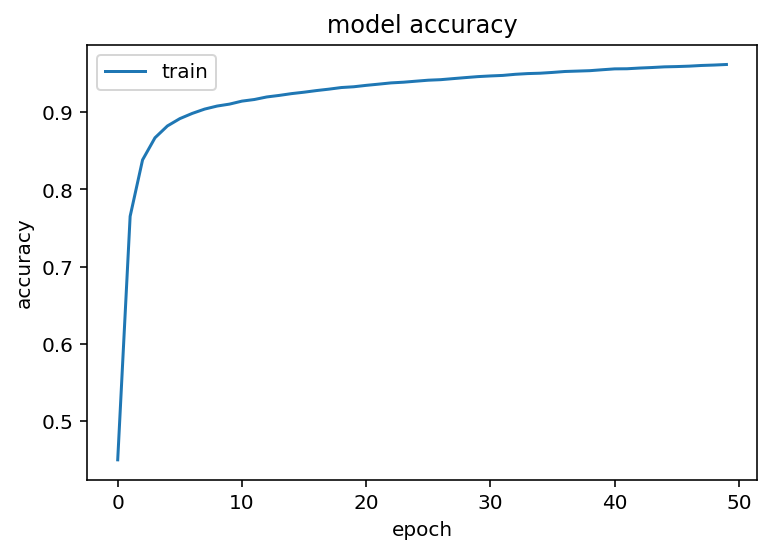

In [9]:
# summarize history for accuracy
#print(history.history.keys())
plt.plot(history.history['accuracy'])           #plot accuracy
plt.title('model accuracy')                #add a title for the plot
plt.ylabel('accuracy')                     #add a y axis label
plt.xlabel('epoch')                        #add x axis label
plt.legend(['train'], loc='upper left')    #add a legend and specify the position
plt.show()

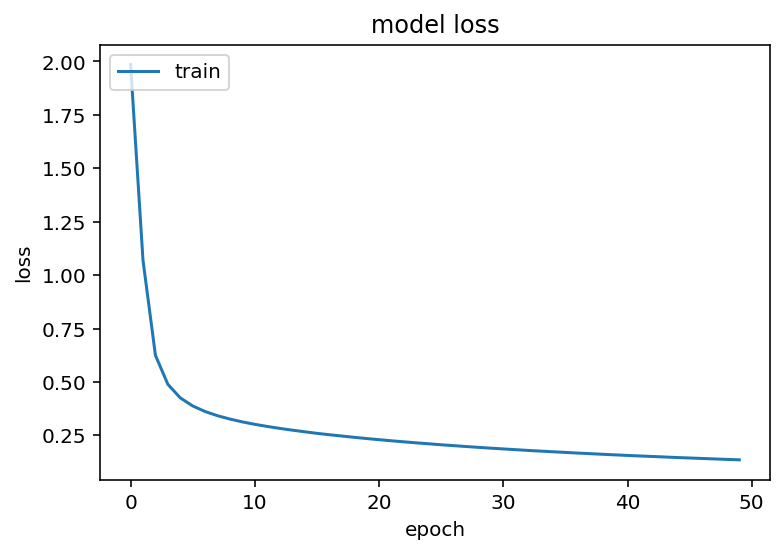

In [10]:
#lets plot loss now
plt.plot(history.history['loss'])          #plot loss
plt.title('model loss')                    #add a title for the plot
plt.ylabel('loss')                         #add a y axis label
plt.xlabel('epoch')                        #add x axis label
plt.legend(['train'], loc='upper left')    #add a legend and specify the position
plt.show()                                 #display plot

<h3>Step 9: Test a Case</h3>

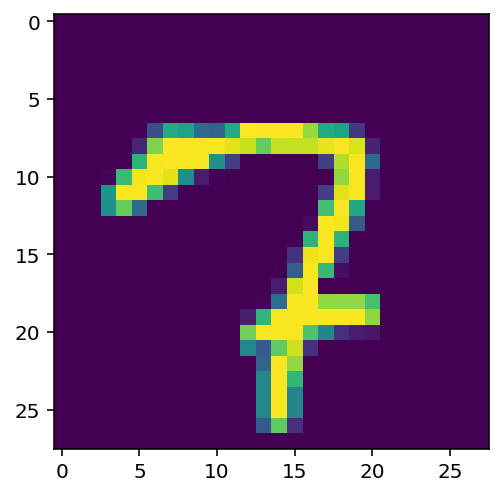

In [11]:
sample = test_x[36]                  #pull a case from test set
sample = sample.reshape((28,28))         #reshape it to 28x28 pixels
plt.imshow(sample)                    #display the image


In [12]:
sample = sample.reshape((1,784))                 #reshape the train set to 1x784
prediction = model.predict_classes(sample)     #based on the pixel values, predict the number
print("Class: ",prediction)                     #print the prediction

Class:  [7]


In [13]:
#display probabilty of each possible number
(model.predict(sample))

array([[3.1956497e-05, 1.9753547e-06, 7.3949960e-03, 1.0213983e-02,
        1.5395378e-06, 2.1140202e-04, 1.4672864e-07, 9.8075473e-01,
        1.5274188e-04, 1.2365080e-03]], dtype=float32)

<h3>Assignment</h3>
Try different cases! Are there numbers that are harder to classify?


<div style="text-align: center;"><img src="../day1/THE CODING HIVE.png" height="120" width="120" />
<div> 2019